In [1]:
import os
import math
import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt
import random
import numpy as np
from IPython import display

In [2]:
# Dataset Path
DATA_DIR = "/content/drive/MyDrive/CVPR/Dataset/Animals"

In [3]:
#Load categories from the dataset directory.
def load_image(data_dir):
    categories = os.listdir(data_dir)
    return categories

In [4]:
#Image preprocessing and image loading
def get_trained_data(categories, data_dir):
    trained_data = []
    for c in categories:
        new_path = os.path.join(data_dir, c)
        for img in tqdm(os.listdir(new_path)):
            label = categories.index(c)  # Assign numeric label based on category
            img_path = os.path.join(new_path, img)

            # Check if the file exists and can be read
            if not os.path.isfile(img_path):
                print(f"Skipping non-file item: {img_path}")
                continue

            # Read image in grayscale
            img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img_arr is None:
                print(f"Unable to read image: {img_path}")
                continue

            # Resize the image
            img_arr = cv2.resize(img_arr, (32, 32))
            trained_data.append([img_arr, label])  # Append image and label

    random.shuffle(trained_data)  # Shuffle the data for randomness
    return trained_data


In [5]:
#Computing eucledian distance between two points
def euclidean_distance(pt1, pt2):
    return np.sqrt(np.sum((pt1 - pt2) ** 2))

In [6]:
#Performing the k-NN classification.
def KNN(validation_set, trained_set, k=5):
    correct_predictions = 0  # To track correctly classified samples

    for v in tqdm(validation_set):
        distances = []  # Store distances and labels for each validation sample

        for t in trained_set:
            # Calculate Euclidean distance between validation and training images
            d = np.sqrt(np.sum((t[0] - v[0]) ** 2))
            distances.append((d, t[1]))  # Append distance and training label

        # Sort distances to find the KNN
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = distances[:k]

        # Get the most common label among the k-nearest neighbors
        labels = [neighbor[1] for neighbor in k_nearest_neighbors]
        predicted_label = max(set(labels), key=labels.count)

        # Check if the prediction is correct
        if predicted_label == v[1]:
            correct_predictions += 1

    # Calculate accuracy
    accuracy = correct_predictions / len(validation_set)
    return accuracy


In [7]:
#Perform k-Fold Cross Validation for k-NN.
def KFOLD(trained_set, kf=5,k_nei=3):
    fold_size = len(trained_set) // kf  # Calculate the size of each fold
    point_dict = {k_nei: []}  # To store accuracies for each fold

    for i in range(kf):
        # Create validation and training sets for the current fold
        test_set = trained_set[i * fold_size:(i + 1) * fold_size]
        train_set = trained_set[:i * fold_size] + trained_set[(i + 1) * fold_size:]

        # Perform k-NN on the current fold
        accuracy = KNN(test_set, train_set, k=k_nei)

        # Store accuracy
        point_dict[k_nei].append(accuracy)

        # Display fold results
        print("-" * 20)
        print(f"FOLD-{i + 1}")
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("-" * 20)

    return point_dict


In [8]:
catag=load_image(DATA_DIR)
trained_data=get_trained_data(catag,DATA_DIR)

100%|██████████| 38/38 [00:09<00:00,  3.99it/s]


In [9]:
K_nei = list(range(1, 31))  # K values from 1 to 30
results = {}

for k in K_nei:
    print(f"{'-'*10} Evaluating for K={k} {'-'*10}")
    result = KFOLD(trained_data, kf=5, k_nei=k)  # Perform 5-fold CV
    results.update(result)  # Store accuracies for each K

# Calculate averages and centroids
average_accuracies = []
for k, accuracies in results.items():
    avg_accuracy = np.mean(accuracies)
    average_accuracies.append(avg_accuracy)

---------- Evaluating for K=1 ----------


100%|██████████| 34/34 [00:00<00:00, 412.38it/s]


--------------------
FOLD-1
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 433.07it/s]


--------------------
FOLD-2
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 387.27it/s]


--------------------
FOLD-3
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 439.62it/s]


--------------------
FOLD-4
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 454.55it/s]


--------------------
FOLD-5
Accuracy: 23.53%
--------------------
---------- Evaluating for K=2 ----------


100%|██████████| 34/34 [00:00<00:00, 403.11it/s]


--------------------
FOLD-1
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 437.84it/s]


--------------------
FOLD-2
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 411.42it/s]


--------------------
FOLD-3
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 279.00it/s]


--------------------
FOLD-4
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 396.14it/s]


--------------------
FOLD-5
Accuracy: 20.59%
--------------------
---------- Evaluating for K=3 ----------


100%|██████████| 34/34 [00:00<00:00, 437.57it/s]


--------------------
FOLD-1
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 449.58it/s]


--------------------
FOLD-2
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 446.69it/s]


--------------------
FOLD-3
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 421.61it/s]


--------------------
FOLD-4
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 637.22it/s]


--------------------
FOLD-5
Accuracy: 17.65%
--------------------
---------- Evaluating for K=4 ----------


100%|██████████| 34/34 [00:00<00:00, 700.51it/s]


--------------------
FOLD-1
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 604.59it/s]


--------------------
FOLD-2
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 684.38it/s]


--------------------
FOLD-3
Accuracy: 35.29%
--------------------


100%|██████████| 34/34 [00:00<00:00, 467.78it/s]


--------------------
FOLD-4
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 524.73it/s]


--------------------
FOLD-5
Accuracy: 17.65%
--------------------
---------- Evaluating for K=5 ----------


100%|██████████| 34/34 [00:00<00:00, 531.03it/s]


--------------------
FOLD-1
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 474.37it/s]


--------------------
FOLD-2
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 589.49it/s]


--------------------
FOLD-3
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 727.61it/s]


--------------------
FOLD-4
Accuracy: 38.24%
--------------------


100%|██████████| 34/34 [00:00<00:00, 634.49it/s]


--------------------
FOLD-5
Accuracy: 17.65%
--------------------
---------- Evaluating for K=6 ----------


100%|██████████| 34/34 [00:00<00:00, 618.52it/s]


--------------------
FOLD-1
Accuracy: 35.29%
--------------------


100%|██████████| 34/34 [00:00<00:00, 701.03it/s]


--------------------
FOLD-2
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 576.79it/s]


--------------------
FOLD-3
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 575.46it/s]


--------------------
FOLD-4
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 564.32it/s]


--------------------
FOLD-5
Accuracy: 11.76%
--------------------
---------- Evaluating for K=7 ----------


100%|██████████| 34/34 [00:00<00:00, 689.66it/s]


--------------------
FOLD-1
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 627.11it/s]


--------------------
FOLD-2
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 706.03it/s]


--------------------
FOLD-3
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 537.25it/s]


--------------------
FOLD-4
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 496.91it/s]


--------------------
FOLD-5
Accuracy: 8.82%
--------------------
---------- Evaluating for K=8 ----------


100%|██████████| 34/34 [00:00<00:00, 468.29it/s]


--------------------
FOLD-1
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 490.99it/s]


--------------------
FOLD-2
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 590.20it/s]


--------------------
FOLD-3
Accuracy: 17.65%
--------------------


100%|██████████| 34/34 [00:00<00:00, 726.64it/s]


--------------------
FOLD-4
Accuracy: 38.24%
--------------------


100%|██████████| 34/34 [00:00<00:00, 691.28it/s]


--------------------
FOLD-5
Accuracy: 5.88%
--------------------
---------- Evaluating for K=9 ----------


100%|██████████| 34/34 [00:00<00:00, 628.87it/s]


--------------------
FOLD-1
Accuracy: 35.29%
--------------------


100%|██████████| 34/34 [00:00<00:00, 687.94it/s]


--------------------
FOLD-2
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 604.83it/s]


--------------------
FOLD-3
Accuracy: 14.71%
--------------------


100%|██████████| 34/34 [00:00<00:00, 605.22it/s]


--------------------
FOLD-4
Accuracy: 35.29%
--------------------


100%|██████████| 34/34 [00:00<00:00, 633.09it/s]


--------------------
FOLD-5
Accuracy: 8.82%
--------------------
---------- Evaluating for K=10 ----------


100%|██████████| 34/34 [00:00<00:00, 627.61it/s]


--------------------
FOLD-1
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 616.92it/s]


--------------------
FOLD-2
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 630.83it/s]


--------------------
FOLD-3
Accuracy: 17.65%
--------------------


100%|██████████| 34/34 [00:00<00:00, 531.31it/s]


--------------------
FOLD-4
Accuracy: 35.29%
--------------------


100%|██████████| 34/34 [00:00<00:00, 464.25it/s]


--------------------
FOLD-5
Accuracy: 11.76%
--------------------
---------- Evaluating for K=11 ----------


100%|██████████| 34/34 [00:00<00:00, 523.55it/s]


--------------------
FOLD-1
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 521.92it/s]


--------------------
FOLD-2
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 546.96it/s]


--------------------
FOLD-3
Accuracy: 14.71%
--------------------


100%|██████████| 34/34 [00:00<00:00, 675.41it/s]


--------------------
FOLD-4
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 632.75it/s]


--------------------
FOLD-5
Accuracy: 17.65%
--------------------
---------- Evaluating for K=12 ----------


100%|██████████| 34/34 [00:00<00:00, 604.03it/s]


--------------------
FOLD-1
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 605.52it/s]


--------------------
FOLD-2
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 613.76it/s]


--------------------
FOLD-3
Accuracy: 11.76%
--------------------


100%|██████████| 34/34 [00:00<00:00, 660.32it/s]


--------------------
FOLD-4
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 593.41it/s]


--------------------
FOLD-5
Accuracy: 17.65%
--------------------
---------- Evaluating for K=13 ----------


100%|██████████| 34/34 [00:00<00:00, 669.52it/s]


--------------------
FOLD-1
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 598.72it/s]


--------------------
FOLD-2
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 354.73it/s]


--------------------
FOLD-3
Accuracy: 17.65%
--------------------


100%|██████████| 34/34 [00:00<00:00, 509.88it/s]


--------------------
FOLD-4
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 531.66it/s]


--------------------
FOLD-5
Accuracy: 14.71%
--------------------
---------- Evaluating for K=14 ----------


100%|██████████| 34/34 [00:00<00:00, 514.32it/s]


--------------------
FOLD-1
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 539.41it/s]


--------------------
FOLD-2
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 444.11it/s]


--------------------
FOLD-3
Accuracy: 14.71%
--------------------


100%|██████████| 34/34 [00:00<00:00, 684.32it/s]


--------------------
FOLD-4
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 683.09it/s]


--------------------
FOLD-5
Accuracy: 20.59%
--------------------
---------- Evaluating for K=15 ----------


100%|██████████| 34/34 [00:00<00:00, 724.18it/s]


--------------------
FOLD-1
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 613.58it/s]


--------------------
FOLD-2
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 640.84it/s]


--------------------
FOLD-3
Accuracy: 17.65%
--------------------


100%|██████████| 34/34 [00:00<00:00, 619.55it/s]


--------------------
FOLD-4
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 682.78it/s]


--------------------
FOLD-5
Accuracy: 14.71%
--------------------
---------- Evaluating for K=16 ----------


100%|██████████| 34/34 [00:00<00:00, 593.60it/s]


--------------------
FOLD-1
Accuracy: 41.18%
--------------------


100%|██████████| 34/34 [00:00<00:00, 628.95it/s]


--------------------
FOLD-2
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 562.81it/s]


--------------------
FOLD-3
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 528.36it/s]


--------------------
FOLD-4
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 474.43it/s]


--------------------
FOLD-5
Accuracy: 17.65%
--------------------
---------- Evaluating for K=17 ----------


100%|██████████| 34/34 [00:00<00:00, 523.47it/s]


--------------------
FOLD-1
Accuracy: 35.29%
--------------------


100%|██████████| 34/34 [00:00<00:00, 575.90it/s]


--------------------
FOLD-2
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 503.28it/s]


--------------------
FOLD-3
Accuracy: 14.71%
--------------------


100%|██████████| 34/34 [00:00<00:00, 704.65it/s]


--------------------
FOLD-4
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 595.43it/s]


--------------------
FOLD-5
Accuracy: 20.59%
--------------------
---------- Evaluating for K=18 ----------


100%|██████████| 34/34 [00:00<00:00, 619.25it/s]


--------------------
FOLD-1
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 552.57it/s]


--------------------
FOLD-2
Accuracy: 17.65%
--------------------


100%|██████████| 34/34 [00:00<00:00, 641.94it/s]


--------------------
FOLD-3
Accuracy: 14.71%
--------------------


100%|██████████| 34/34 [00:00<00:00, 689.02it/s]


--------------------
FOLD-4
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 667.44it/s]


--------------------
FOLD-5
Accuracy: 20.59%
--------------------
---------- Evaluating for K=19 ----------


100%|██████████| 34/34 [00:00<00:00, 644.05it/s]


--------------------
FOLD-1
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 601.90it/s]


--------------------
FOLD-2
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 510.43it/s]


--------------------
FOLD-3
Accuracy: 11.76%
--------------------


100%|██████████| 34/34 [00:00<00:00, 451.71it/s]


--------------------
FOLD-4
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 521.47it/s]


--------------------
FOLD-5
Accuracy: 26.47%
--------------------
---------- Evaluating for K=20 ----------


100%|██████████| 34/34 [00:00<00:00, 547.60it/s]


--------------------
FOLD-1
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 683.72it/s]


--------------------
FOLD-2
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 532.41it/s]


--------------------
FOLD-3
Accuracy: 11.76%
--------------------


100%|██████████| 34/34 [00:00<00:00, 691.39it/s]


--------------------
FOLD-4
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 700.27it/s]


--------------------
FOLD-5
Accuracy: 23.53%
--------------------
---------- Evaluating for K=21 ----------


100%|██████████| 34/34 [00:00<00:00, 649.45it/s]


--------------------
FOLD-1
Accuracy: 32.35%
--------------------


100%|██████████| 34/34 [00:00<00:00, 571.05it/s]


--------------------
FOLD-2
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 640.74it/s]


--------------------
FOLD-3
Accuracy: 14.71%
--------------------


100%|██████████| 34/34 [00:00<00:00, 655.21it/s]


--------------------
FOLD-4
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 596.38it/s]


--------------------
FOLD-5
Accuracy: 11.76%
--------------------
---------- Evaluating for K=22 ----------


100%|██████████| 34/34 [00:00<00:00, 593.09it/s]


--------------------
FOLD-1
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 566.05it/s]


--------------------
FOLD-2
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 473.14it/s]


--------------------
FOLD-3
Accuracy: 17.65%
--------------------


100%|██████████| 34/34 [00:00<00:00, 425.60it/s]


--------------------
FOLD-4
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 539.83it/s]


--------------------
FOLD-5
Accuracy: 14.71%
--------------------
---------- Evaluating for K=23 ----------


100%|██████████| 34/34 [00:00<00:00, 512.08it/s]


--------------------
FOLD-1
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 581.71it/s]


--------------------
FOLD-2
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 534.93it/s]


--------------------
FOLD-3
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 578.92it/s]


--------------------
FOLD-4
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 650.47it/s]


--------------------
FOLD-5
Accuracy: 20.59%
--------------------
---------- Evaluating for K=24 ----------


100%|██████████| 34/34 [00:00<00:00, 674.81it/s]


--------------------
FOLD-1
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 601.65it/s]


--------------------
FOLD-2
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 636.12it/s]


--------------------
FOLD-3
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 617.42it/s]


--------------------
FOLD-4
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 666.92it/s]


--------------------
FOLD-5
Accuracy: 20.59%
--------------------
---------- Evaluating for K=25 ----------


100%|██████████| 34/34 [00:00<00:00, 441.73it/s]


--------------------
FOLD-1
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 478.06it/s]


--------------------
FOLD-2
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 515.11it/s]


--------------------
FOLD-3
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 501.32it/s]


--------------------
FOLD-4
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 598.02it/s]


--------------------
FOLD-5
Accuracy: 14.71%
--------------------
---------- Evaluating for K=26 ----------


100%|██████████| 34/34 [00:00<00:00, 650.38it/s]


--------------------
FOLD-1
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 713.58it/s]


--------------------
FOLD-2
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 541.47it/s]


--------------------
FOLD-3
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 656.55it/s]


--------------------
FOLD-4
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 623.85it/s]


--------------------
FOLD-5
Accuracy: 14.71%
--------------------
---------- Evaluating for K=27 ----------


100%|██████████| 34/34 [00:00<00:00, 644.54it/s]


--------------------
FOLD-1
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 631.03it/s]


--------------------
FOLD-2
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 680.90it/s]


--------------------
FOLD-3
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 581.93it/s]


--------------------
FOLD-4
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 668.41it/s]


--------------------
FOLD-5
Accuracy: 17.65%
--------------------
---------- Evaluating for K=28 ----------


100%|██████████| 34/34 [00:00<00:00, 547.21it/s]


--------------------
FOLD-1
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 552.25it/s]


--------------------
FOLD-2
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 504.07it/s]


--------------------
FOLD-3
Accuracy: 17.65%
--------------------


100%|██████████| 34/34 [00:00<00:00, 500.50it/s]


--------------------
FOLD-4
Accuracy: 29.41%
--------------------


100%|██████████| 34/34 [00:00<00:00, 492.70it/s]


--------------------
FOLD-5
Accuracy: 17.65%
--------------------
---------- Evaluating for K=29 ----------


100%|██████████| 34/34 [00:00<00:00, 630.95it/s]


--------------------
FOLD-1
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 626.93it/s]


--------------------
FOLD-2
Accuracy: 26.47%
--------------------


100%|██████████| 34/34 [00:00<00:00, 513.37it/s]


--------------------
FOLD-3
Accuracy: 14.71%
--------------------


100%|██████████| 34/34 [00:00<00:00, 632.13it/s]


--------------------
FOLD-4
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 504.17it/s]


--------------------
FOLD-5
Accuracy: 11.76%
--------------------
---------- Evaluating for K=30 ----------


100%|██████████| 34/34 [00:00<00:00, 551.50it/s]


--------------------
FOLD-1
Accuracy: 20.59%
--------------------


100%|██████████| 34/34 [00:00<00:00, 649.23it/s]


--------------------
FOLD-2
Accuracy: 23.53%
--------------------


100%|██████████| 34/34 [00:00<00:00, 669.46it/s]


--------------------
FOLD-3
Accuracy: 11.76%
--------------------


100%|██████████| 34/34 [00:00<00:00, 627.18it/s]


--------------------
FOLD-4
Accuracy: 38.24%
--------------------


100%|██████████| 34/34 [00:00<00:00, 572.34it/s]

--------------------
FOLD-5
Accuracy: 11.76%
--------------------


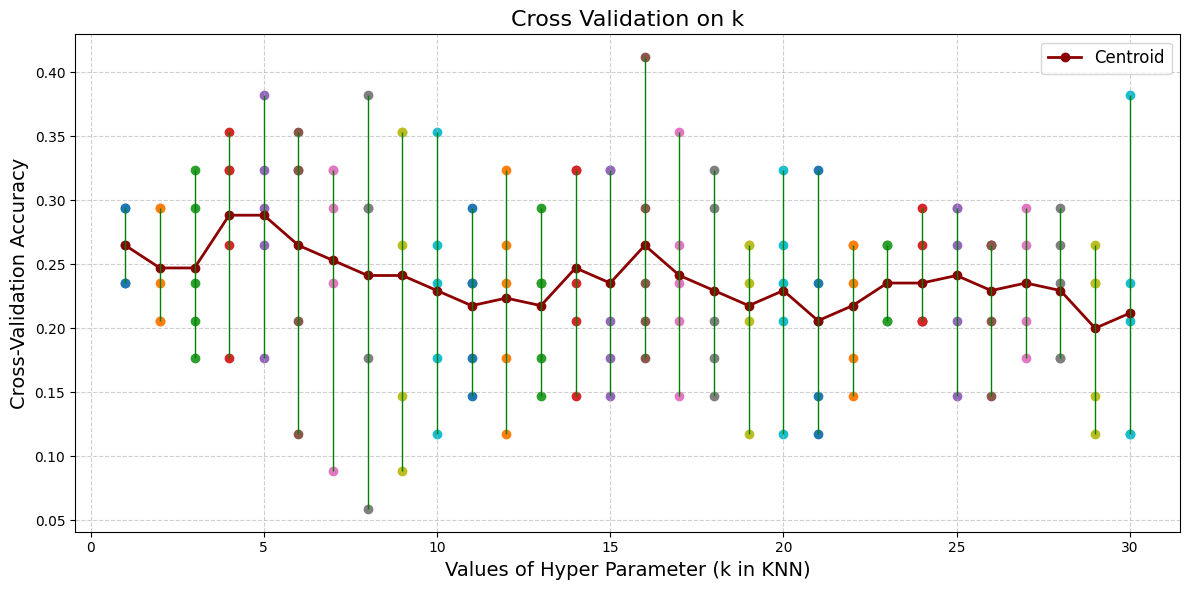

In [10]:
# Updated Plotting the results
plt.figure(figsize=(12, 6))
plt.title("Cross Validation on k", fontsize=16)
plt.xlabel("Values of Hyper Parameter (k in KNN)", fontsize=14)
plt.ylabel("Cross-Validation Accuracy", fontsize=14)

# Plot the average accuracies (line)
plt.plot(K_nei, average_accuracies, color='darkred', marker='o', linewidth=2, label="Centroid")

# Add vertical lines for accuracy ranges
for k, accuracies in results.items():
    min_acc = min(accuracies)
    max_acc = max(accuracies)
    avg_acc = np.mean(accuracies)
    # Draw vertical line for range
    plt.vlines(x=k, ymin=min_acc, ymax=max_acc, color='green', linewidth=1)
    # Scatter plot for individual fold accuracies
    plt.scatter([k] * len(accuracies), accuracies)

# Add legend and finalize the plot
plt.legend(["Centroid"], fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [11]:
#Name: Asadulla Al Mamun
#ID:21-45862-3